In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df  = pd.read_csv('data.csv')

The main objective of the data set is to find who is diagnosed with cancer

In [111]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Finding the Null Values

In [112]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [113]:
df.shape

(569, 33)

In [114]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

unnamed 32 is a null value column so we can drop it

In [115]:
df['id'].value_counts()

883263     1
906564     1
89122      1
9013579    1
868682     1
          ..
874158     1
914062     1
918192     1
872113     1
875878     1
Name: id, Length: 569, dtype: int64

we can see id column has 569 values and it only refers the id in of the row. that doen't impact the dataset

we are droping unwanted columns from the table

In [116]:
y = df.diagnosis
df.drop(['id','diagnosis','Unnamed: 32'],inplace=True,axis=1)

lets see the columns having categorical values

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

we can see all are numerical value

In [118]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

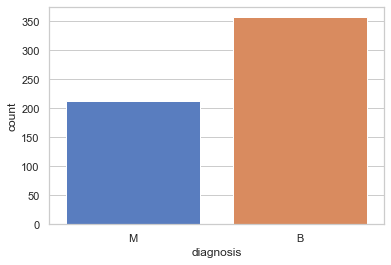

In [119]:
sns.countplot(x=y,data =df)

where (M = malignant, B = benign) Benign means not dangerous, Malignant means dangerous

we don't know much about this data, in order to understand the data, we have to do Feature Analysis, using mean,variance,standard deviation etc. 

Usually we check is there any correlation between the features,by analysing mean meadian of the values. 

for this we can use voilin plot which helps to understand the data easily. but since there may be outliers we can use scaling meh=thods like standerdization, Min Max scaling to analyse the data 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

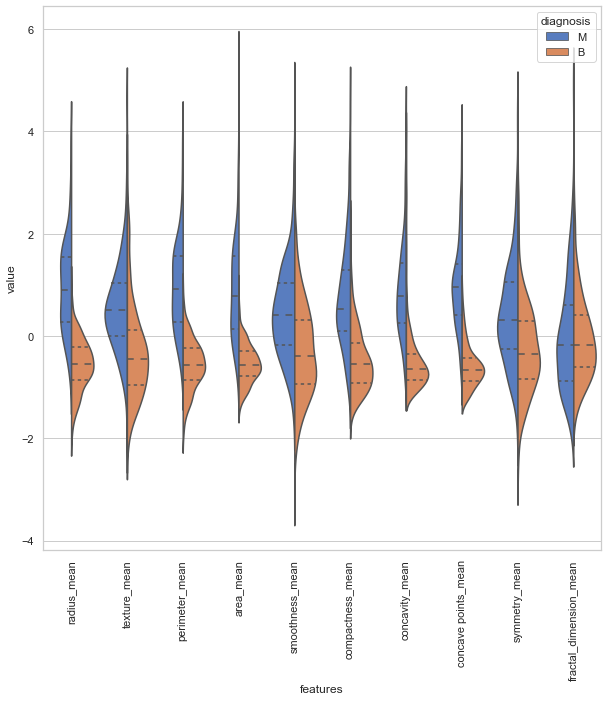

In [120]:
## lets analyse for 10 features
diagnosis =y
data_stan = (df - df.mean())/df.std() #standardisation
data = pd.concat([y,data_stan.iloc[:,:10]],axis=1) #taking first 10 values
data =pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value') # melting the values in a single column to plot easily
plt.figure(figsize=(10,10))
sns.violinplot(x ='features',y='value',hue='diagnosis',data=data, split=True,inner='quart')
plt.xticks(rotation =90)


we can see in  fractal_dimension_mean meadian of Malignant and Bening are equal which says its not good for classification

But if you see other values there is huge diffrence in the median values of the categories which are good for classification

In [121]:
## to understand what pd.melt does
pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')

C:\Users\nandh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,diagnosis,features,value
0,M,features,radius_mean
1,M,features,radius_mean
2,M,features,radius_mean
3,M,features,radius_mean
4,M,features,radius_mean
...,...,...,...
11375,M,value,-0.930209
11376,M,value,-1.05768
11377,M,value,-0.8948
11378,M,value,1.04278


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

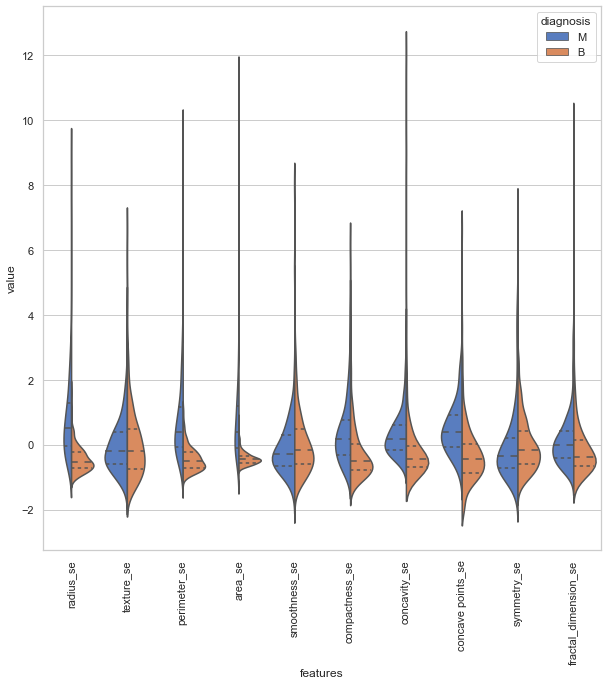

In [122]:
# next 10 features

data = pd.concat([y,data_stan.iloc[:,10:20]],axis=1)
data =pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x ='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation =90)

Here we can see texture_se,smoothness_se, symmetry_se are not suitable for classification

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

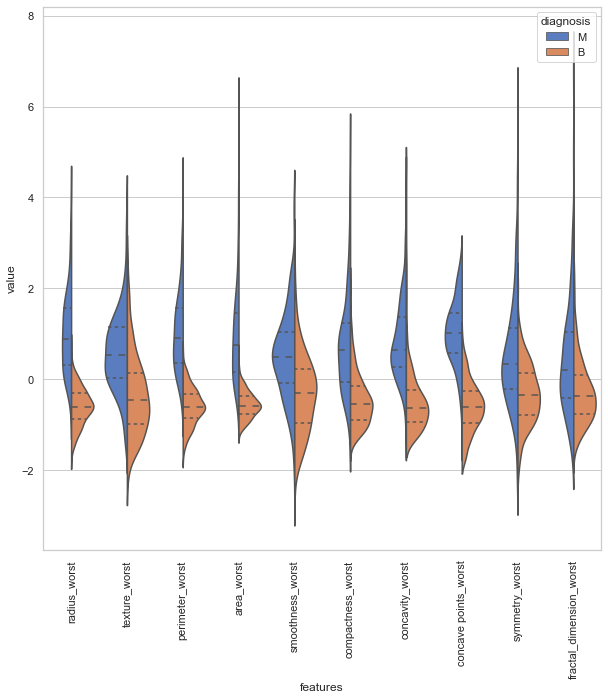

In [123]:
# next 10 features

data = pd.concat([y,data_stan.iloc[:,20:31]],axis=1)
data =pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x ='features',y='value',hue='diagnosis',data=data,split=True,inner='quart')
plt.xticks(rotation =90)

We can also use box plot to analyse, but it is mostly used to analyse outliers in the features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

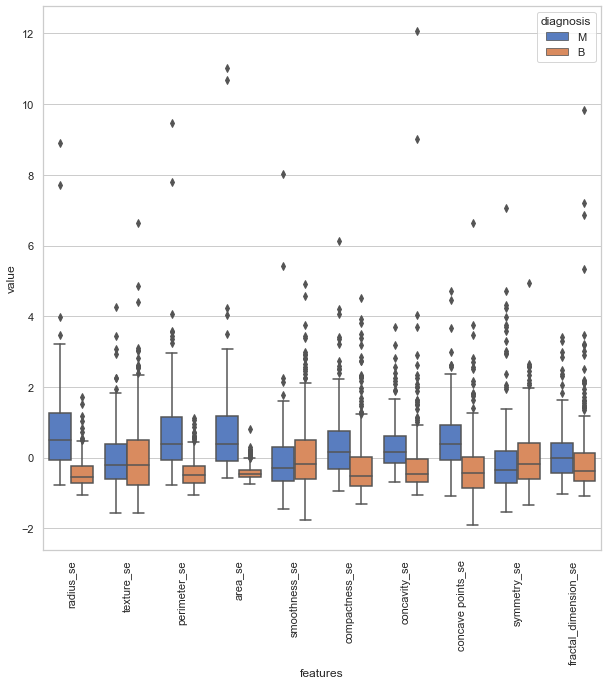

In [124]:
data = pd.concat([y,data_stan.iloc[:,10:20]],axis=1)
data =pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x = 'features',y ='value',hue='diagnosis',data =data)
plt.xticks(rotation = 90)

from above plot we can say radius_se,perimeter_se have similar box plot they might be coorelated, lets doa histogram to analyse these two data

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


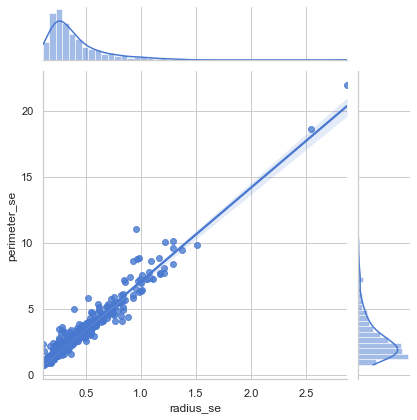

In [125]:
## lets use Joint plot

sns.jointplot(df.loc[:,'radius_se'],df.loc[:,'perimeter_se'],kind='reg')

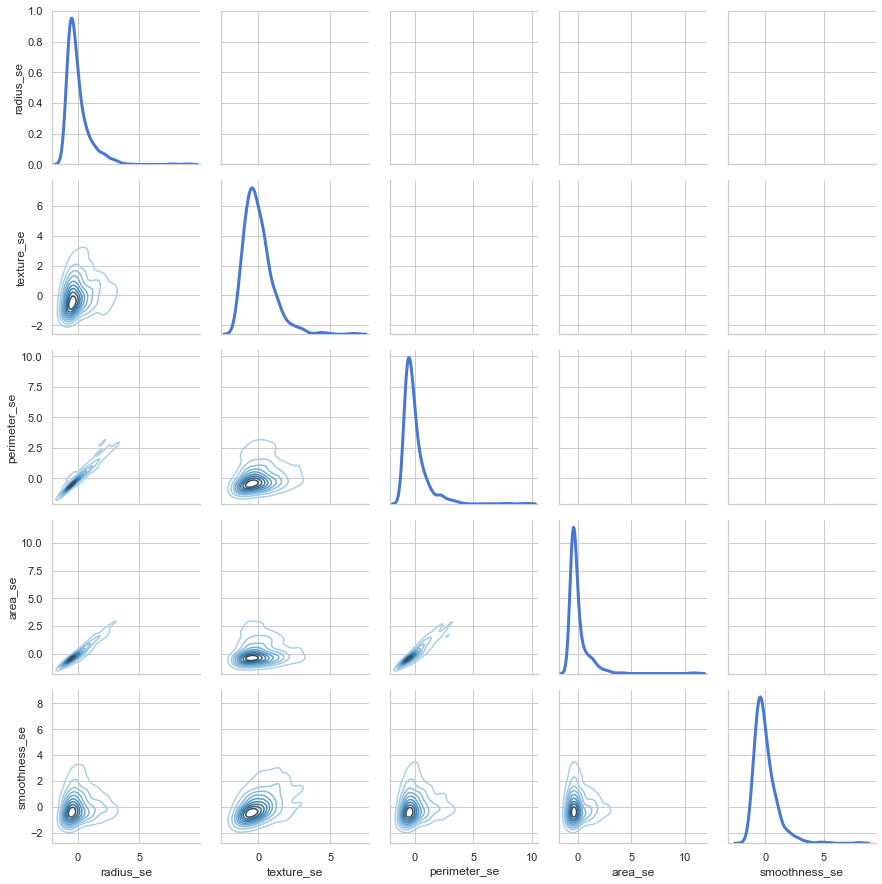

In [126]:
###  you can use pair plot for ploting major values
g = sns.PairGrid(data_stan.iloc[:,10:15],diag_sharey=False)

g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

we have seen many plots let use swam plot to get into next level

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.7% of the points

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

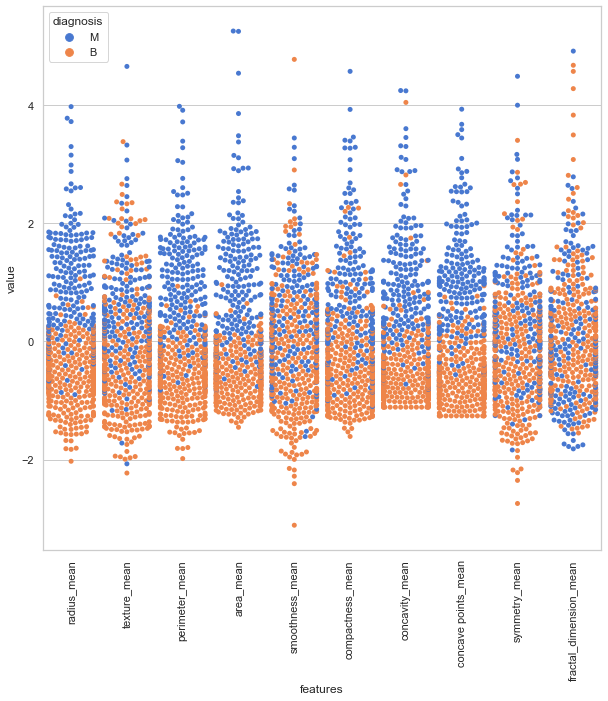

In [127]:
import time
sns.set(style="whitegrid", palette="muted")
diag = y
data = df
data_std = (data-data.mean())/data.std()
data = pd.concat([diag,data_std.iloc[:,:10]],axis =1)
data = pd.melt(data,id_vars = 'diagnosis',value_name='value',var_name='features')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(data=data,x='features',y='value',hue='diagnosis')
plt.xticks(rotation=90)

from the above plot we can easily calssify area_mean,concave points_mean as M and D, but we can't classify fractal_dimension_mean, since D and M are scatterd all over the plot

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 61.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.6% of the points

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

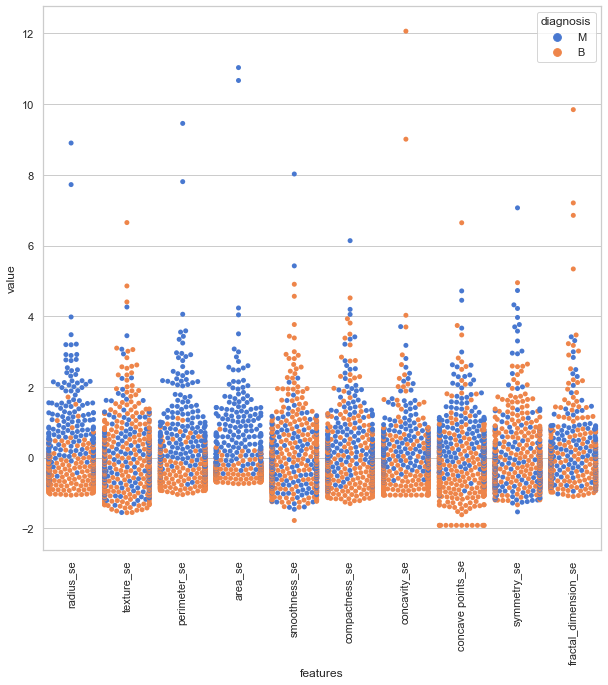

In [128]:
# next 10 values
data = pd.concat([diag,data_std.iloc[:,10:20]],axis =1)
data = pd.melt(data,id_vars = 'diagnosis',value_name='value',var_name='features')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(data=data,x='features',y='value',hue='diagnosis')
plt.xticks(rotation=90)

similary we can do for all the features to understand the features in the data

C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nandh\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.9% of the points

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

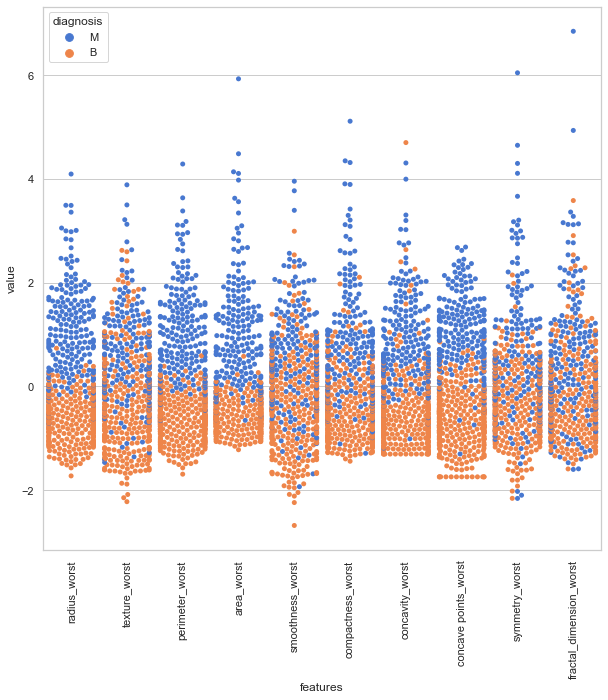

In [129]:
# next 10 values
data = pd.concat([diag,data_std.iloc[:,20:31]],axis =1)
data = pd.melt(data,id_vars = 'diagnosis',value_name='value',var_name='features')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(data=data,x='features',y='value',hue='diagnosis')
plt.xticks(rotation=90)

in this radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst can be easily classified, other features can't be classified 


Let understand the coorelation by classic method using heatmap, we could have done this directly, but it is important to understand the data set before getting into feature selection  

#### Feature Selection

<AxesSubplot:>

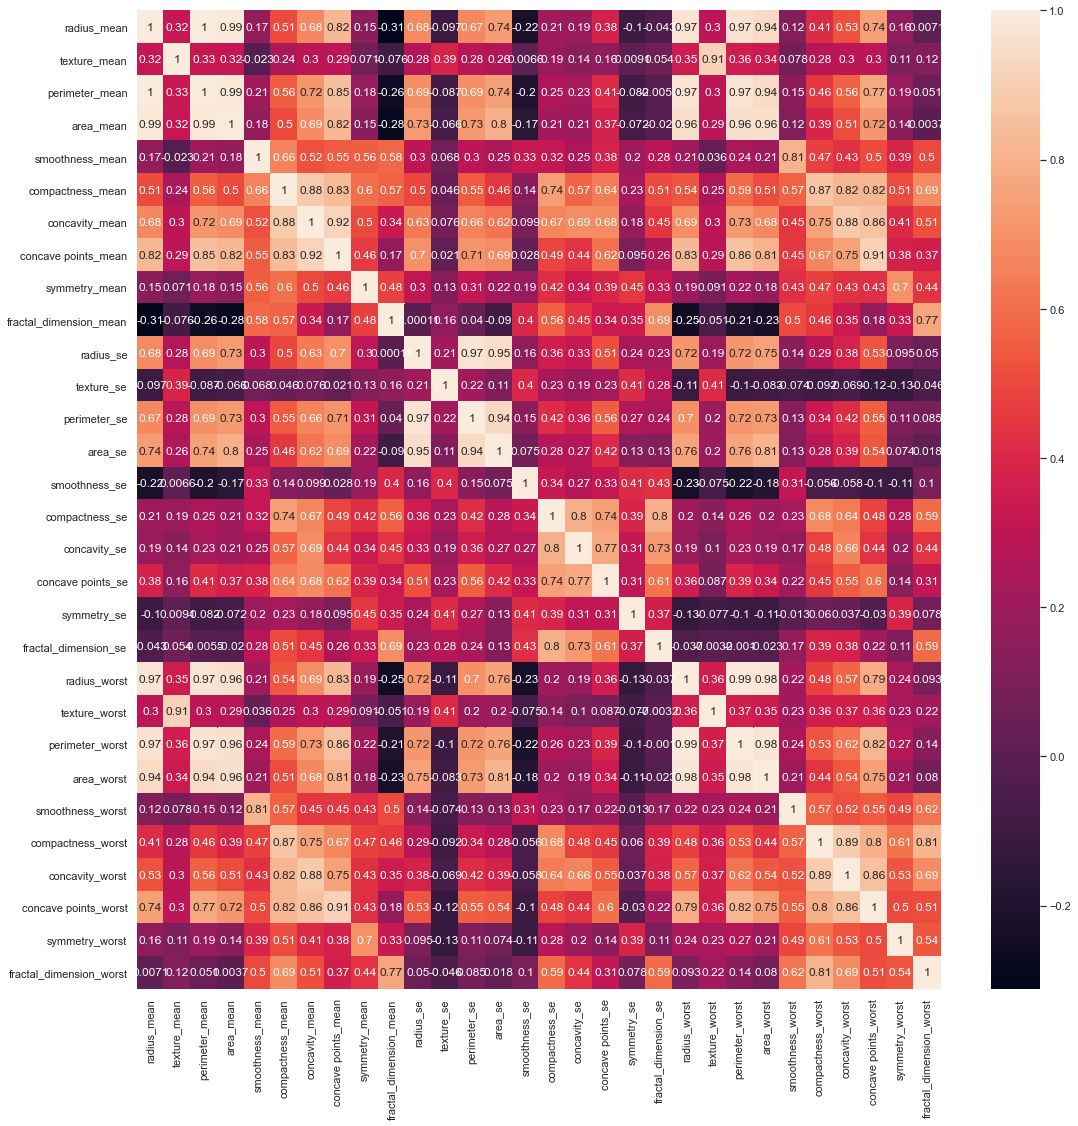

In [130]:
f,ax = plt.subplots(figsize =(18,18))
sns.heatmap(df.corr(),annot= True)

In [131]:
df.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

values near by 1 indicates higly corelated so we can drop those values.

for eg:
    > radius_mean,perimeter_mean,area_mean are highly corelated so taking only one feature radius_mean
    
    > radius_worst,perimeter_worst, area_worst are corelated so taking radius_worst alone
    
    
    > radius_se,perimeter_se,area_se are corelated so taking radius_se alone
    
    
    > texture_mean and texture_worst are corelated so taking texture_mean alone
    
    
    > Compactness_mean, concavity_mean and concave points_mean are corelated so taking  Compactness_mean
    
    
    > Compactness_worst, concavity_worst and concave points_worst are corelated so taking  Compactness_worst
    
    > concavity_se, concave points_se are co realated 
   
    > fractal_dimension_se,compactness_se 

In [132]:
col_drop = ['perimeter_mean','area_mean','perimeter_worst', 'area_worst','perimeter_se','area_se','texture_worst','concavity_mean','concave points_mean','concavity_se','concavity_worst','fractal_dimension_se']

In [133]:
df.drop(col_drop,axis=1,inplace= True)

In [134]:
df.shape

(569, 18)

<AxesSubplot:>

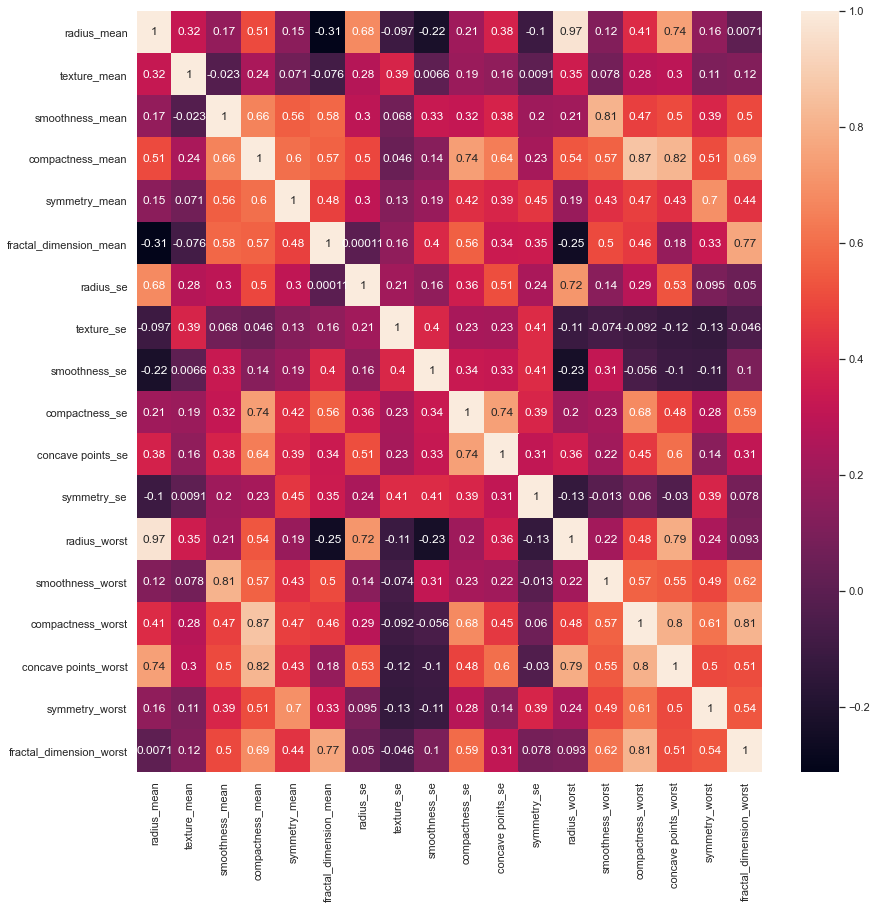

In [135]:
f,ax =plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)

we can see radious worst is corelated with radious mean so removing one feature



In [136]:
df.drop('radius_worst',axis=1,inplace= True)

we have chossen our features but we dont know it is correct so lets do random forest

In [137]:
df.shape

(569, 17)

0.9473684210526315


<AxesSubplot:>

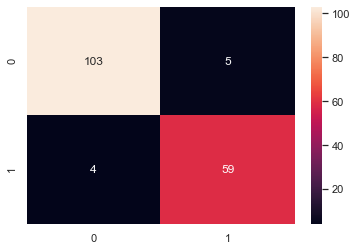

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
x_tr,x_te,y_tr,y_te = train_test_split(df,y,test_size=0.3,random_state=42)

clf = RandomForestClassifier()
clf = clf.fit(x_tr,y_tr)
ac = accuracy_score(y_te,clf.predict(x_te))
cm= confusion_matrix(y_te,clf.predict(x_te))
print(ac)
sns.heatmap(cm,annot=True,fmt='d')

we have got accuracy arround .95 which is good but we can optimize more, by choosing correct feature

### Univariate feature Selection.

Univariate Analysis means Selecting features by comparing single feature to the target and finding the result

In [139]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

sele_five = SelectKBest(chi2,k=5).fit(x_tr,y_tr)

In [140]:
print(sele_five.scores_)
for i in range(len(x_tr.columns)):
    print(x_tr.columns[i], ':' ,sele_five.scores_[i])

[1.77946492e+02 6.06916433e+01 1.00015175e-01 3.41839493e+00
 1.95982847e-01 3.42575072e-04 2.45882967e+01 4.07131026e-02
 1.32470372e-03 3.74071521e-01 2.01587194e-01 1.39557806e-03
 2.63226314e-01 1.19077581e+01 8.90751003e+00 1.00635138e+00
 1.23087347e-01]
radius_mean : 177.94649171678145
texture_mean : 60.69164330517206
smoothness_mean : 0.10001517503315899
compactness_mean : 3.4183949321342344
symmetry_mean : 0.1959828472884777
fractal_dimension_mean : 0.0003425750717589389
radius_se : 24.588296655397116
texture_se : 0.04071310262224921
smoothness_se : 0.0013247037199600653
compactness_se : 0.374071521123189
concave points_se : 0.20158719379732326
symmetry_se : 0.0013955780572281243
smoothness_worst : 0.26322631413503794
compactness_worst : 11.907758066812995
concave points_worst : 8.907510031900609
symmetry_worst : 1.0063513808449278
fractal_dimension_worst : 0.12308734679698985


We select first 5 columns having max values 

radius_mean,texture_mean,radius_se, compactness_worst, concave points_worst

lets find score for this five values

In [141]:
X_tr = sele_five.transform(x_tr)
X_te = sele_five.transform(x_te)

In [142]:
RDclass = RandomForestClassifier()

In [143]:
RDclass.fit(X_tr,y_tr)

RandomForestClassifier()

In [144]:
print(accuracy_score(y_te,RDclass.predict(X_te)))

0.9415204678362573


we can see 5 features can give accuracy of 96%

<AxesSubplot:>

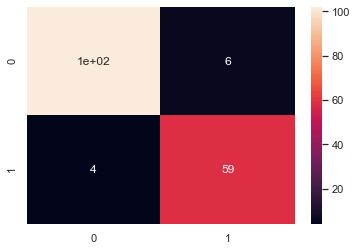

In [145]:
sns.heatmap(confusion_matrix(y_te,RDclass.predict(X_te)),annot=True)

From the above we can see that we have increased the accuracy from 95% to 96%.because of few wrong prediction. 

let see another selection method.


### Recursive Feature Elemination Method

This methods uses the machine learning algoritham giiven by us, and assing weigghts to each feature, where smallest weights are cut down from the dataset by recursively going through all the features.

In [146]:
from sklearn.feature_selection import RFE

RF_class_2 = RandomForestClassifier()
Select_5 = RFE(estimator=RF_class_2,n_features_to_select=5,step=1)
Select_5 = Select_5.fit(x_tr,y_tr)

In [147]:
print(x_tr.columns[Select_5.support_])

Index(['radius_mean', 'compactness_mean', 'radius_se', 'compactness_worst',
       'concave points_worst'],
      dtype='object')


We can see it has choosen the same features

From this we can be sure about our feature selection, that we have made correct choice.

Lets do Recursive feature elimination with cross validation 

### Recursive feature elimination with cross validation and random forest classification

In previous method we found how many features we needed most by our own choice, 

But in this method we can find how many features can give best accuracy and the choice is made by cross validation

In [148]:
from sklearn.feature_selection import RFECV

RF_Class_3 = RandomForestClassifier()

Select_RFECV = RFECV(estimator=RF_Class_3, step = 1, cv = 5, scoring='accuracy')

Select_RFECV.fit(x_tr,y_tr)

print(Select_RFECV.n_features_)

6


In [149]:
print(x_tr.columns[Select_RFECV.support_])

Index(['radius_mean', 'texture_mean', 'compactness_mean', 'radius_se',
       'compactness_worst', 'concave points_worst'],
      dtype='object')


 We can see it selected  7 features out of all 

Lets Plot the cross validation scores 

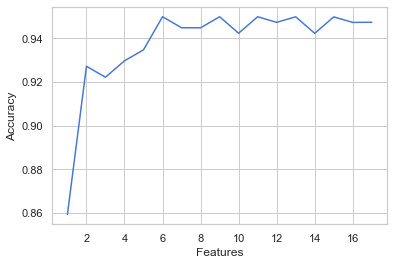

In [150]:
plt.figure()
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.plot(range(1,len(Select_RFECV.grid_scores_)+1),Select_RFECV.grid_scores_)

we can see at  7 the highest accuracy can be achived 